# LSTM-BI-LSTM-GRU-BI-GRU-RNN-BRNN 
# ALL Optimizers
# SpamAssasin Dataset

In [1]:
!pip3 install tensorflow-addons
!pip3 install keras-adabound
!pip3 install adabelief-tf==0.2.0

     |████████████████████████████████| 1.1 MB 8.8 MB/s 
  Created wheel for keras-adabound: filename=keras_adabound-0.6.0-py3-none-any.whl size=6607 sha256=85779b97e5bfc6db20860ff965c6181d5c3db03d2948fd9f34192a4f65efc063
  Stored in directory: /root/.cache/pip/wheels/3e/bf/39/3d95847ef12aa58c15a6cc7a20f4f21ea39fcd52793e1beea0
Successfully built keras-adabound


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Time and counters
from time import perf_counter

# Optimizers
import tensorflow as tf 
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Nadam, Adadelta, Adamax, Ftrl
from adabelief_tf import AdaBeliefOptimizer
from keras_adabound import AdaBound

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Dense, Embedding, Bidirectional,concatenate
from tensorflow.keras.layers import Dropout, Input,InputLayer, ReLU, LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
# from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#metrics
from sklearn.metrics import f1_score , recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings('ignore')

#Mark Down print
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Optimizers and other paths

In [4]:
#paths
SPAMASSASIN   = "drive/MyDrive/Mahboob/Datasets/SpamAssasin/PROCESSED.csv" 
heatmaps   = "drive/MyDrive/Mahboob/Heatmaps/SpamAssasin/"
Visuals    = "drive/MyDrive/Mahboob/Visuals/SPAMASSASIN/"
Comparison = "drive/MyDrive/Mahboob/Comparison/"


adabelief      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/ADABELIEF/"
adabound      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/ADABOUND/"
adadelta      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/ADADELTA/"
adagrad      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/ADAGRAD/"
adam      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/ADAM/"
adamax      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/ADAMAX/"
adamw      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/ADAMW/"
amsbound      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/AMSBOUND/"
amsgrad      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/AMSGRAD/"
ftrl      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/FTRL/"
nadam      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/NADAM/"
radam      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/RADAM/"
rmsprop      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/RMSPROP/"
sgd      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/SGD/"
sgd_nesterov      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/SGD-NESTEROV/"
sgd_momentum      = "drive/MyDrive/Mahboob/Models/SPAMASSASIN/SGD-MOMENTUM/"

In [5]:
# 1. ALL Optimizer List
# Adam weight decay

AdamW = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
AMSGrad = Adam(amsgrad=True)
Rectified_Adam = tfa.optimizers.RectifiedAdam(learning_rate=0.001)

SGD_momentum = SGD(momentum=0.9)
Nesterov_SGD_momentum = SGD(momentum=0.9, nesterov=True)
#Adam #Nadam #SGD #RMSprop #Adadelta #Adagrad #Adamax #Ftrl
AdaBelief = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
Adabound = AdaBound(lr=1e-3, final_lr=0.1)
AMSbound = AdaBound(lr=1e-3, final_lr=0.1, amsgrad=True)

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



In [6]:
# drive.mount("/content/drive", force_remount=True)
import sys
sys.path.append("drive/MyDrive/Mahboob/")
!ls
from utils import *

drive  sample_data
Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



# Read Data

In [12]:
data = pd.read_csv(SPAMASSASIN)
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# data.to_csv(SPAMASSASIN, index=False)

In [13]:
data.head()

,X,label
0,seen even oprah health discovery actually reve...,1
1,html html html html number html html html html...,1
2,number fight risk cancer httpaddr number numbe...,1
3,looking property spain waste time people look ...,1
4,removal instruction listing internet work comp...,1


# Data Splitting

In [15]:
#Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(data.X , data.label, test_size = 0.2, random_state = 99)
print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")
print(f"Training split class: {y_train.shape}")
print(f"Testing split class : {y_test.shape}")

maxLen = len(max(X_train.astype("U"), key=len).split())
print(f"Max length of the sentence in corpus : {maxLen}")

Training split input: (2563,)
Testing split input : (641,)
Training split class: (2563,)
Testing split class : (641,)
Max length of the sentence in corpus : 25272


In [16]:
print(f"Type of X_train : {type(X_train)}")
print(f"Training sample shape: \n{X_train.shape}\n")
x_train = np.array(X_train.copy())
x_train = x_train.astype(str)
print(f"Type of X_train : {type(x_train)} with dtypes : {x_train.dtype}")
print(f"First training sample: \n{x_train[0]}\n")
print(f"Training sample shape: \n{x_train.shape}\n\n")

print(f"Type of X_test : {type(X_test)}")
print(f"First testing sample shape: \n{X_test.shape}\n\n")
x_test = np.array(X_test.copy())
x_test= x_test.astype(str)
print(f"Type of X_test : {type(x_test)} with dtypes : {x_test.dtype}")
print(f"First testing sample: \n{x_test[0]}\n\n")
print(f"Testing sample shape: \n{x_test.shape}\n\n")

print(f"Type of y_train : {type(y_train)}")
print(f"First training label shape: \n{y_train.shape}\n\n")
Y_train = np.array(y_train.copy())
print(f"Type of y_train : {type(Y_train)}")
print(f"First training label : \n{Y_train[0]}\n\n")
print(f"Training label shape: \n{Y_train.shape}\n\n")

print(f"Type of y_test : {type(y_test)}")
print(f"First testing label shape: \n{y_test.shape}\n\n")
Y_test = np.array(y_test.copy())
print(f"Type of y_test : {type(Y_test)}")
print(f"First testing label : \n{Y_test[0]}\n\n")
print(f"Testing label shape: \n{Y_test.shape}\n\n")


Type of X_train : <class 'pandas.core.series.Series'>
Training sample shape: 
(2563,)

Type of X_train : <class 'numpy.ndarray'> with dtypes : <U202630
First training sample: 
number number wrote anyone considered fact occurrances appear increasing aware maybe publicity surrounding started looking actually started looking deep infrasound pressure wave network station designed enforced nuke test treaty discovered pretty impact norm current infrasound station detect bolide meteoroid number scale number event relatively frequent number people died tunguska event number number number despite hitting middle nowhere httpaddr number number number number search cache number jrhgdb number usra meeting number thmars number number bolide impact wave number earth atmosphere large number bright light flash energy light impulse number number number higher registered satellite equipped photoelectric detector number number intense light impulse created impact meteoroid disrupted atmosphere mainly alti

# ***Data set Processing***
1. Vocabulary creation 
2. Tokenization
3. Text to sequence / word to vector
4. Padding to max length
5. Implement sequence/index to word

In [17]:
"""
Input text Processing
steps : 

1. Vocabulary creation 
2. Tokenization
3. Text to sequence / word to vector
4. Padding to max length
5. Implement sequence/index to word
"""

# reference : https://www.kaggle.com/anirudhchandnani/ann-vs-lstm-vs-bi-lstm-on-nlp
#ANN

Train_data = x_train.copy()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)
tokenizer.word_index.keys()

Vocabulary Size : 65905


dict_keys(['html', 'number', 'nbsp', 'httpaddr', 'dollar', 'emailaddr', 'email', 'list', 'mail', 'free', 'time', 'information', 'address', 'business', 'please', 'click', 'make', 'people', 'user', 'money', 'like', 'message', 'would', 'company', 'site', 'order', 'mailing', 'system', 'work', 'name', 'year', 'service', 'report', 'program', 'internet', 'file', 'also', 'linux', 'need', 'want', 'send', 'software', 'product', 'home', 'right', 'receive', 'know', 'first', 'change', 'price', 'offer', 'color', 'state', 'group', 'find', 'line', 'link', 'help', 'take', 'million', 'server', 'window', 'much', 'could', 'many', 'subscription', 'check', 'size', 'today', 'even', 'week', 'read', 'month', 'life', 'news', 'computer', 'using', 'grant', 'well', 'available', 'world', 'form', 'online', 'back', 'every', 'best', 'spam', 'government', 'page', 'wrote', 'good', 'thing', 'remove', 'phone', 'version', 'problem', 'credit', 'call', 'cfont', 'ffont', 'code', 'face', 'card', 'network', 'made', 'security', 

In [18]:
# Index to word Function dict
idx_to_word = dict(map(reversed, tokenizer.word_index.items()))
print(f"length of word to index : {len(word_index)}")
print(f"length of index to word : {len(idx_to_word)}")

length of word to index : 65904
length of index to word : 65904


In [19]:
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = 2000, padding="post")
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = 2000, padding="post")

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

print(f"Training : {type(x_train)}")
print(f"Testing: {type(x_test)}")

Training X Shape: (2563, 2000)
Testing X Shape: (641, 2000)
Training : <class 'numpy.ndarray'>
Testing: <class 'numpy.ndarray'>


In [20]:
#The first 5 training samples
for i in range(5):
  print(x_train[i],"\n")

[ 2  2 90 ...  0  0  0] 

[13943    84    81 ...     0     0     0] 

[4445    1 9287 ...    0    0    0] 

[ 267   21 1335 ...    0    0    0] 

[ 6 69  1 ...  0  0  0] 



In [21]:
## some config values 
embed_size = 50 # how big is each word vector
max_feature = vocab_size # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

# Model Training

In [22]:
def Model_Train(arc_func, optim_func):
  model = arc_func(maxLength=max_len, maxFeature= max_feature, embedding_vecor_length= embed_size)
  model.compile(optimizer=optim_func, loss='binary_crossentropy', metrics=['accuracy',])
  start = perf_counter()
  history = model.fit(x_train, Y_train, batch_size=512, epochs=10, validation_split=0.2)
  duration = perf_counter() - start
  duration = round(duration,2)

  # Predicting the Test set results
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5)
  y_pred = np.array(y_pred)

  test_loss, test_acc = model.evaluate(x_test, Y_test)
  test_err = 100 - test_acc*100

  print(f"Test Loss:     {test_loss*100} %")
  print(f"Test Accuracy: {test_acc*100}  %")
  print(f"Test error: {test_err}  %")

  return model, history, duration, y_pred, test_loss

In [23]:
Optimizer_list = ["Adam", "Nadam", "SGD", "RMSProp", "Adagrad", "Adadelta", "Ftrl", "SGD-Momentum", "SGD-Nesterov-Momentum", "Adam-Weight-Decay"] 

Optimizer_function_list = [Adam(), Nadam(), SGD(), RMSprop(), Adagrad(), Adadelta(), Ftrl(), SGD(momentum=0.9), SGD(momentum=0.9, nesterov=True), tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)]


Model_Architectures = {
    "BRNN" : BI_RNN_ARCHITECTURE,
    "Bi-LSTM" : BI_LSTM_ARCHITECTURE,
    "Bi-GRU" : BI_GRU_ARCHITECTURE
}

Deliverables = {
    "Optimizer_history" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []
    },
    "Models" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Duration" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Y_pred" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Test_Loss" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
}



# BRNN - Bi-LSTM - Bi-GRU
## Adam, Nadam, SGD, RMSprop, Adagrad, Adadelta, Ftrl, SGD momentum, SGD Nesterov Momentum, Adamw 

In [24]:
for k,v in enumerate(Model_Architectures.items()):
  for j in Optimizer_function_list:
    print(f"{k} : {v} , optimizer : {j}")
    model, history, duration, y_pred, test_loss = Model_Train(v[1],j)
    Deliverables["Optimizer_history"][v[0]].append(history)
    Deliverables["Models"][v[0]].append(model)
    Deliverables["Duration"][v[0]].append(duration)
    Deliverables["Y_pred"][v[0]].append(y_pred)
    Deliverables["Test_Loss"][v[0]].append(test_loss)
    print("done training")

0 : ('BRNN', <function BI_RNN_ARCHITECTURE at 0x7efd0d31b050>) , optimizer : <keras.optimizer_v2.adam.Adam object at 0x7efd0c8af990>
Epoch 1/10
5/5 [==============================] - 20s 3s/step - loss: 0.6764 - accuracy: 0.5756 - val_loss: 0.6563 - val_accuracy: 0.6296
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 0.6006 - accuracy: 0.7224 - val_loss: 0.6201 - val_accuracy: 0.6979
Epoch 3/10
5/5 [==============================] - 16s 3s/step - loss: 0.5190 - accuracy: 0.8688 - val_loss: 0.5415 - val_accuracy: 0.7251
Epoch 4/10
5/5 [==============================] - 16s 3s/step - loss: 0.3892 - accuracy: 0.8883 - val_loss: 0.4882 - val_accuracy: 0.8051
Epoch 5/10
5/5 [==============================] - 16s 3s/step - loss: 0.3347 - accuracy: 0.9332 - val_loss: 0.5208 - val_accuracy: 0.7544
Epoch 6/10
5/5 [==============================] - 16s 3s/step - loss: 0.2973 - accuracy: 0.9220 - val_loss: 0.4088 - val_accuracy: 0.8304
Epoch 7/10
5/5 [=======================

# Model comparison table with metrics : 
1. Accuracy
  - Train Accuracy from history object
  - Test Accuracy from get_Metrics Function in utils
2. Loss
  - Train loss curve From history object
  - Test loss From Model Evaluation  
3. Precision, Recall, F1 score
4. ROC AUC

In [25]:
"""
Model comparison table with metrics : 
1. Accuracy
2. Loss
3. Error
4. Precision, Recall, F1 score
5. ROC AUC
"""
Model_comparison = dict()

for k,v in enumerate(Model_Architectures.items()):
  for index_of_optim, i in enumerate(Optimizer_list):
    # print(v[0])
    history_curr = Deliverables["Optimizer_history"][v[0]][index_of_optim]
    acc_train = history_curr.history["accuracy"][len(history_curr.history["accuracy"])-1]
    
    y_pred = Deliverables["Y_pred"][v[0]][index_of_optim]
    
    loss_test = Deliverables["Test_Loss"][v[0]][index_of_optim]
    
    duration = Deliverables["Duration"][v[0]][index_of_optim]
    
    precision, recall, f1_score_, acc_test, auc_ = get_Metrics(Y_test, y_pred)
    
    Model_comparison[f"{v[0]} {i}"] = { 
        "Train_acc":acc_train, 
        "Test_acc":acc_test, 
        "Test_loss" : loss_test, 
        "auroc":auc_, 
        "f1_score":f1_score_, 
        "precision":precision, 
        "recall":recall,  
        "duration": duration 
        }
    print(f"{v[0]} {i} done")    

BRNN Adam done
BRNN Nadam done
BRNN SGD done
BRNN RMSProp done
BRNN Adagrad done
BRNN Adadelta done
BRNN Ftrl done
BRNN SGD-Momentum done
BRNN SGD-Nesterov-Momentum done
BRNN Adam-Weight-Decay done
Bi-LSTM Adam done
Bi-LSTM Nadam done
Bi-LSTM SGD done
Bi-LSTM RMSProp done
Bi-LSTM Adagrad done
Bi-LSTM Adadelta done
Bi-LSTM Ftrl done
Bi-LSTM SGD-Momentum done
Bi-LSTM SGD-Nesterov-Momentum done
Bi-LSTM Adam-Weight-Decay done
Bi-GRU Adam done
Bi-GRU Nadam done
Bi-GRU SGD done
Bi-GRU RMSProp done
Bi-GRU Adagrad done
Bi-GRU Adadelta done
Bi-GRU Ftrl done
Bi-GRU SGD-Momentum done
Bi-GRU SGD-Nesterov-Momentum done
Bi-GRU Adam-Weight-Decay done


In [26]:
import re
models_metrics = []
BRNN_metrics = []
BILSTM_metrics = []
BIGRU_metrics = []
ALL = [models_metrics, BRNN_metrics, BILSTM_metrics, BIGRU_metrics] 
ALL_names = ["SpamAssasin_comparison", "SpamAssasin_BRNN_comparison", "SpamAssasin_Bi-LSTM_comparison", "SpamAssasin_Bi-GRU_comparison"]

for name, model in Model_comparison.items():
  precision, recall, f1_score_,  = model["precision"], model["recall"], model["f1_score"]
  Test_acc, auc_, Test_loss = model["Test_acc"], model["auroc"], model["Test_loss"],
  Train_acc, duration = model["Train_acc"], model["duration"]
  models_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^BRNN*", name):
    BRNN_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^Bi-LSTM*", name):
    BILSTM_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^Bi-GRU*", name):
    BIGRU_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])

for i,j in zip(ALL, ALL_names):
  df_metrics = pd.DataFrame(i)
  df_metrics.columns = ['Model', 'Precision', 'Recall', 'f1 score', "Train Accuracy", 'Test Accuracy', 'Loss', 'ROC-AUC', 'Train Time (s)']
  df_metrics.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
  df_metrics.reset_index(drop = True, inplace=True)
  df_metrics.to_csv(f"{Comparison}{j}.csv")

In [27]:
import pprint
pprint.pprint(Model_comparison)

{'BRNN Adadelta': {'Test_acc': 0.514820592823713,
                   'Test_loss': 0.6904586553573608,
                   'Train_acc': 0.5082926750183105,
                   'auroc': 0.501850985893539,
                   'duration': 161.43,
                   'f1_score': 0.3510646262821577,
                   'precision': 0.542812077512393,
                   'recall': 0.501850985893539},
 'BRNN Adagrad': {'Test_acc': 0.5507020280811232,
                  'Test_loss': 0.6882726550102234,
                  'Train_acc': 0.5463414788246155,
                  'auroc': 0.543429974281038,
                  'duration': 203.33,
                  'f1_score': 0.5098763858799541,
                  'precision': 0.562290409121395,
                  'recall': 0.5434299742810381},
 'BRNN Adam': {'Test_acc': 0.8876755070202809,
               'Test_loss': 0.2824416756629944,
               'Train_acc': 0.9707317352294922,
               'auroc': 0.8896666276985427,
               'duration': 203.46,
  

In [28]:
df_metrics

,Model,Precision,Recall,f1 score,Train Accuracy,Test Accuracy,Loss,ROC-AUC,Train Time (s)
0,Bi-GRU Adam,0.959358,0.959493,0.959416,0.984390,0.959438,0.128461,0.959493,19.56
1,Bi-GRU RMSProp,0.958336,0.958470,0.957878,0.979512,0.957878,0.120459,0.958470,20.42
2,Bi-GRU Adam-Weight-Decay,0.954706,0.955016,0.954747,0.983415,0.954758,0.132676,0.955016,19.52
3,Bi-GRU Nadam,0.950400,0.949794,0.950014,0.988780,0.950078,0.133212,0.949794,20.07
4,Bi-GRU SGD-Momentum,0.734245,0.678518,0.662505,0.643902,0.684867,0.678395,0.678518,19.46
5,Bi-GRU SGD,0.660501,0.627056,0.602480,0.632195,0.620905,0.690197,0.627056,19.67
6,Bi-GRU SGD-Nesterov-Momentum,0.667545,0.611498,0.571036,0.590732,0.603744,0.669326,0.611498,20.32
7,Bi-GRU Adagrad,0.483622,0.498894,0.352289,0.507317,0.511700,0.692850,0.498894,19.46
8,Bi-GRU Ftrl,0.243370,0.500000,0.327387,0.495610,0.486739,0.693155,0.500000,19.47
9,Bi-GRU Adadelta,0.463545,0.492265,0.362265,0.458537,0.480499,0.694619,0.492265,19.47


# Save the model objects for graph

In [29]:
import pickle
with open(f"{Visuals}SpamAssasin_history.pkl", "wb") as open_file:
    pickle.dump(Deliverables["Optimizer_history"], open_file)
with open(f"{Visuals}SpamAssasin_y_pred.pkl", "wb") as open_file:
    pickle.dump(Deliverables["Y_pred"], open_file)
with open(f"{Visuals}SpamAssasin.pkl", "wb") as open_file:
    pickle.dump(Deliverables, open_file)

INFO:tensorflow:Assets written to: ram://9ddc32bf-17b1-46b3-bacf-b54ca55860fc/assets
INFO:tensorflow:Assets written to: ram://6937e66e-aef3-4199-88c2-21fdace3cde5/assets
INFO:tensorflow:Assets written to: ram://054c8d0b-11f3-4dfe-a009-86fb921959e7/assets
INFO:tensorflow:Assets written to: ram://0923f0fb-f657-46e1-ba71-2af7b5adc5f8/assets
INFO:tensorflow:Assets written to: ram://89950c09-7d12-4772-a129-1422311b6c5e/assets
INFO:tensorflow:Assets written to: ram://e9f67932-52bd-4553-b44d-cea03762fe1f/assets
INFO:tensorflow:Assets written to: ram://5145cd7e-679c-4912-900c-f58e5f00f571/assets
INFO:tensorflow:Assets written to: ram://7928884f-56c1-406b-97d2-91726deac1bf/assets
INFO:tensorflow:Assets written to: ram://07c3b1c7-705c-465b-a743-911bd9816ec2/assets
INFO:tensorflow:Assets written to: ram://ca4ec92b-d568-4024-b2db-26380cde5ee1/assets


INFO:tensorflow:Assets written to: ram://f213a17f-bbd7-4a5f-ac80-8c809ca85b56/assets


INFO:tensorflow:Assets written to: ram://f213a17f-bbd7-4a5f-ac80-8c809ca85b56/assets


INFO:tensorflow:Assets written to: ram://da6fab33-8d3d-476b-ad81-8cfa80d62fc4/assets


INFO:tensorflow:Assets written to: ram://da6fab33-8d3d-476b-ad81-8cfa80d62fc4/assets


INFO:tensorflow:Assets written to: ram://3e6d7cb6-173b-4e00-8982-130bc97a58bd/assets


INFO:tensorflow:Assets written to: ram://3e6d7cb6-173b-4e00-8982-130bc97a58bd/assets


INFO:tensorflow:Assets written to: ram://f04cc149-4b56-4a74-8eae-68d5f23a4ee2/assets


INFO:tensorflow:Assets written to: ram://f04cc149-4b56-4a74-8eae-68d5f23a4ee2/assets


INFO:tensorflow:Assets written to: ram://f0c96242-ccf8-4ca1-b208-0727006030cc/assets


INFO:tensorflow:Assets written to: ram://f0c96242-ccf8-4ca1-b208-0727006030cc/assets


INFO:tensorflow:Assets written to: ram://13328535-d2e6-4ed3-b5c1-fe992bb4c40b/assets


INFO:tensorflow:Assets written to: ram://13328535-d2e6-4ed3-b5c1-fe992bb4c40b/assets


INFO:tensorflow:Assets written to: ram://84e8398f-3b9c-4b4c-b94a-e65754e84a62/assets


INFO:tensorflow:Assets written to: ram://84e8398f-3b9c-4b4c-b94a-e65754e84a62/assets


INFO:tensorflow:Assets written to: ram://27bea9d1-2d8e-417b-ac74-6c06d0691b76/assets


INFO:tensorflow:Assets written to: ram://27bea9d1-2d8e-417b-ac74-6c06d0691b76/assets


INFO:tensorflow:Assets written to: ram://2a24564a-804f-456c-8e36-be5438280a52/assets


INFO:tensorflow:Assets written to: ram://2a24564a-804f-456c-8e36-be5438280a52/assets


INFO:tensorflow:Assets written to: ram://50abf060-344b-4153-8088-b5c160d19ca4/assets


INFO:tensorflow:Assets written to: ram://50abf060-344b-4153-8088-b5c160d19ca4/assets


INFO:tensorflow:Assets written to: ram://003a660d-fc5c-4a46-985e-b670cecca26c/assets


INFO:tensorflow:Assets written to: ram://003a660d-fc5c-4a46-985e-b670cecca26c/assets


INFO:tensorflow:Assets written to: ram://af514983-1705-4e55-a49f-2f1d19fad7bf/assets


INFO:tensorflow:Assets written to: ram://af514983-1705-4e55-a49f-2f1d19fad7bf/assets


INFO:tensorflow:Assets written to: ram://94e7f2b7-4887-440f-b252-70f83da9d1ab/assets


INFO:tensorflow:Assets written to: ram://94e7f2b7-4887-440f-b252-70f83da9d1ab/assets


INFO:tensorflow:Assets written to: ram://3bbb7ef3-8983-4b8c-8b1b-f2daad459825/assets


INFO:tensorflow:Assets written to: ram://3bbb7ef3-8983-4b8c-8b1b-f2daad459825/assets


INFO:tensorflow:Assets written to: ram://1ce49392-9fca-481f-aadb-4aabe0b897dd/assets


INFO:tensorflow:Assets written to: ram://1ce49392-9fca-481f-aadb-4aabe0b897dd/assets


INFO:tensorflow:Assets written to: ram://caa2fe6e-446b-42f3-9fb7-023c2730c26f/assets


INFO:tensorflow:Assets written to: ram://caa2fe6e-446b-42f3-9fb7-023c2730c26f/assets


INFO:tensorflow:Assets written to: ram://f82ffab8-a8f9-43b7-acdc-e7229bea73d5/assets


INFO:tensorflow:Assets written to: ram://f82ffab8-a8f9-43b7-acdc-e7229bea73d5/assets


INFO:tensorflow:Assets written to: ram://bd1012de-58a0-403b-b670-b3148752a7d6/assets


INFO:tensorflow:Assets written to: ram://bd1012de-58a0-403b-b670-b3148752a7d6/assets


INFO:tensorflow:Assets written to: ram://a95915df-a2be-46f5-9078-557d049b7013/assets


INFO:tensorflow:Assets written to: ram://a95915df-a2be-46f5-9078-557d049b7013/assets


INFO:tensorflow:Assets written to: ram://549b83e7-3164-4a21-ac7a-d757c12b9aba/assets


INFO:tensorflow:Assets written to: ram://549b83e7-3164-4a21-ac7a-d757c12b9aba/assets


INFO:tensorflow:Assets written to: ram://d7cea841-b8c4-42f1-ac52-1a02d567191a/assets


INFO:tensorflow:Assets written to: ram://d7cea841-b8c4-42f1-ac52-1a02d567191a/assets


INFO:tensorflow:Assets written to: ram://0463c8ce-1c5b-4a3a-83b0-317eeeb60081/assets


INFO:tensorflow:Assets written to: ram://0463c8ce-1c5b-4a3a-83b0-317eeeb60081/assets


INFO:tensorflow:Assets written to: ram://c219cb86-d352-4f52-b2d9-dc52e5d2e8b3/assets


INFO:tensorflow:Assets written to: ram://c219cb86-d352-4f52-b2d9-dc52e5d2e8b3/assets


INFO:tensorflow:Assets written to: ram://5d29c842-ef10-4f0a-a31f-69e8b4b62587/assets


INFO:tensorflow:Assets written to: ram://5d29c842-ef10-4f0a-a31f-69e8b4b62587/assets


INFO:tensorflow:Assets written to: ram://8b18019a-64ca-4e26-9e5d-b0265c245bd0/assets


INFO:tensorflow:Assets written to: ram://8b18019a-64ca-4e26-9e5d-b0265c245bd0/assets


INFO:tensorflow:Assets written to: ram://cab3c085-ab2d-4c83-8897-b58abe1a1a4f/assets


INFO:tensorflow:Assets written to: ram://cab3c085-ab2d-4c83-8897-b58abe1a1a4f/assets


INFO:tensorflow:Assets written to: ram://35d0ac64-5fd3-4ff7-8daa-6d59de7ae461/assets


INFO:tensorflow:Assets written to: ram://35d0ac64-5fd3-4ff7-8daa-6d59de7ae461/assets


INFO:tensorflow:Assets written to: ram://420aa714-a5b3-411c-9558-499fe51456ec/assets


INFO:tensorflow:Assets written to: ram://420aa714-a5b3-411c-9558-499fe51456ec/assets


INFO:tensorflow:Assets written to: ram://3311db9c-3339-4b1f-ae14-5c09be2a9bcb/assets


INFO:tensorflow:Assets written to: ram://3311db9c-3339-4b1f-ae14-5c09be2a9bcb/assets


INFO:tensorflow:Assets written to: ram://1f61d4d1-098e-4a08-b439-ef00f2051fe1/assets


INFO:tensorflow:Assets written to: ram://1f61d4d1-098e-4a08-b439-ef00f2051fe1/assets


INFO:tensorflow:Assets written to: ram://084c3d7a-9baf-49ea-986c-a48e702e29db/assets


INFO:tensorflow:Assets written to: ram://084c3d7a-9baf-49ea-986c-a48e702e29db/assets


INFO:tensorflow:Assets written to: ram://d79225a0-40f1-4c92-8358-1e91fcba9614/assets


INFO:tensorflow:Assets written to: ram://d79225a0-40f1-4c92-8358-1e91fcba9614/assets


INFO:tensorflow:Assets written to: ram://fd0c9749-a2bb-4d41-b7e4-3298ad9d630a/assets


INFO:tensorflow:Assets written to: ram://fd0c9749-a2bb-4d41-b7e4-3298ad9d630a/assets


INFO:tensorflow:Assets written to: ram://f045d9f1-12f5-4b2c-914d-35b6be01a563/assets


INFO:tensorflow:Assets written to: ram://f045d9f1-12f5-4b2c-914d-35b6be01a563/assets


INFO:tensorflow:Assets written to: ram://18bbd841-de58-440b-ac91-e54f30803078/assets


INFO:tensorflow:Assets written to: ram://18bbd841-de58-440b-ac91-e54f30803078/assets


INFO:tensorflow:Assets written to: ram://874d4d60-6e45-4e53-bd9b-6e276cf0dc01/assets


INFO:tensorflow:Assets written to: ram://874d4d60-6e45-4e53-bd9b-6e276cf0dc01/assets


INFO:tensorflow:Assets written to: ram://94a9162b-62d5-41d4-8ad6-ef77f664b935/assets


INFO:tensorflow:Assets written to: ram://94a9162b-62d5-41d4-8ad6-ef77f664b935/assets


INFO:tensorflow:Assets written to: ram://1849baa4-dd88-49c2-9b04-8d7261e58ecd/assets


INFO:tensorflow:Assets written to: ram://1849baa4-dd88-49c2-9b04-8d7261e58ecd/assets


INFO:tensorflow:Assets written to: ram://cf403a37-43fe-4b70-956f-f468b35eb602/assets


INFO:tensorflow:Assets written to: ram://cf403a37-43fe-4b70-956f-f468b35eb602/assets


INFO:tensorflow:Assets written to: ram://ef6c09c7-1f40-46e3-bc71-dd2de08a4a62/assets


INFO:tensorflow:Assets written to: ram://ef6c09c7-1f40-46e3-bc71-dd2de08a4a62/assets


INFO:tensorflow:Assets written to: ram://d29dbd54-44e7-4d0e-88d0-5773652173d4/assets


INFO:tensorflow:Assets written to: ram://d29dbd54-44e7-4d0e-88d0-5773652173d4/assets


INFO:tensorflow:Assets written to: ram://3409489a-d4e5-4a9b-94c8-7bc03714a6a4/assets


INFO:tensorflow:Assets written to: ram://3409489a-d4e5-4a9b-94c8-7bc03714a6a4/assets


INFO:tensorflow:Assets written to: ram://b1467779-91e3-42d0-bd1a-1c2640935a25/assets


INFO:tensorflow:Assets written to: ram://b1467779-91e3-42d0-bd1a-1c2640935a25/assets


INFO:tensorflow:Assets written to: ram://b2d8bdb0-4387-4d03-8c51-425fda4594c7/assets


INFO:tensorflow:Assets written to: ram://b2d8bdb0-4387-4d03-8c51-425fda4594c7/assets


INFO:tensorflow:Assets written to: ram://107625ed-e61c-4c34-ba35-9931fa308b19/assets


INFO:tensorflow:Assets written to: ram://107625ed-e61c-4c34-ba35-9931fa308b19/assets


INFO:tensorflow:Assets written to: ram://51dd3637-c58d-40db-880e-b63515068f32/assets


INFO:tensorflow:Assets written to: ram://51dd3637-c58d-40db-880e-b63515068f32/assets


INFO:tensorflow:Assets written to: ram://8abf1ef6-9434-4d23-8e96-a38db3b78c6c/assets


INFO:tensorflow:Assets written to: ram://8abf1ef6-9434-4d23-8e96-a38db3b78c6c/assets


INFO:tensorflow:Assets written to: ram://a4cfa884-f738-473b-9f03-915ac3d3fd34/assets


INFO:tensorflow:Assets written to: ram://a4cfa884-f738-473b-9f03-915ac3d3fd34/assets


INFO:tensorflow:Assets written to: ram://5892ff09-d459-454f-b56c-f7f6bad157c7/assets


INFO:tensorflow:Assets written to: ram://5892ff09-d459-454f-b56c-f7f6bad157c7/assets


INFO:tensorflow:Assets written to: ram://7512d4ff-1f2b-424f-ba07-88ca736552d5/assets


INFO:tensorflow:Assets written to: ram://7512d4ff-1f2b-424f-ba07-88ca736552d5/assets


BRNN [<keras.callbacks.History object at 0x7efd0c8ac2d0>, <keras.callbacks.History object at 0x7efd00157a10>, <keras.callbacks.History object at 0x7efc767379d0>, <keras.callbacks.History object at 0x7efc7608cb90>, <keras.callbacks.History object at 0x7efc706794d0>, <keras.callbacks.History object at 0x7efc702ebc50>, <keras.callbacks.History object at 0x7efb6dec4110>, <keras.callbacks.History object at 0x7efb6d934790>, <keras.callbacks.History object at 0x7efb68a7e7d0>, <keras.callbacks.History object at 0x7efb65f1b410>]
Bi-LSTM [<keras.callbacks.History object at 0x7efb6658bf10>, <keras.callbacks.History object at 0x7efb62096710>, <keras.callbacks.History object at 0x7efb5ed2f410>, <keras.callbacks.History object at 0x7efb486d7410>, <keras.callbacks.History object at 0x7efa24e1a2d0>, <keras.callbacks.History object at 0x7efa22f73210>, <keras.callbacks.History object at 0x7efa22086350>, <keras.callbacks.History object at 0x7efa1f8383d0>, <keras.callbacks.History object at 0x7efa1d1cf410

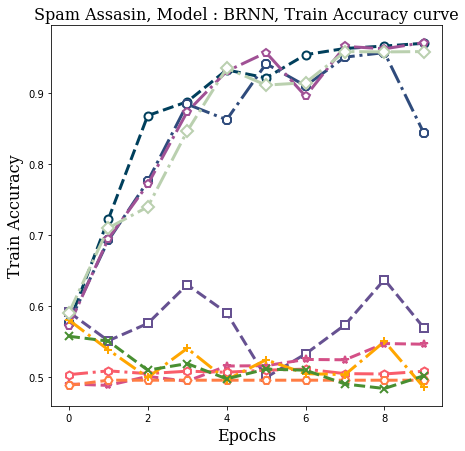

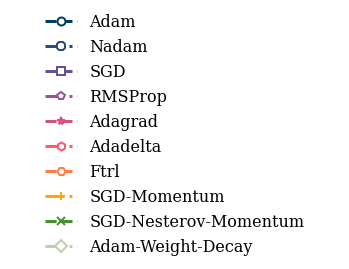

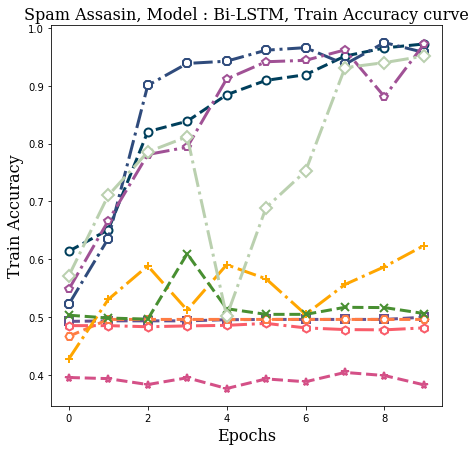

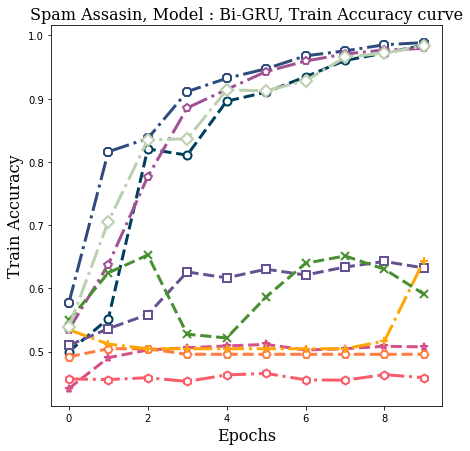

In [35]:
Histories = Deliverables["Optimizer_history"].copy()

col = ['#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#dadaeb','#bcbddc','#9e9ac8','#807dba','#6a51a3']
col_2 = ["#238b45", "#88419d", "#2b8cbe", "#ef6548", "#3690c0", "#df65b0", "#41b6c4", "#6a51a3", "#c7e9b4", "#74a9cf"]
col_3 = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600","#488f31","#bad0af"]

from cycler import cycler
import matplotlib.pyplot as plt
custom_cycler = (cycler(color=col_3) +
                 cycler(marker=['o', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D']))

# Global plot parameters
plt.rc('lines', linewidth=3, markerfacecolor='white', markeredgewidth=2, markersize=8, linestyle='--')
plt.rc('axes', prop_cycle=custom_cycler)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

def plot_metric(metric, history, y_label):

  for k, v in enumerate(history.items()):
    print(v[0],v[1])
    fig, ax = plt.subplots(figsize=(7,7))  # Create a figure and an axes.
    #plot legend handles
    plt_handles = []
    for index_of_optim, i in enumerate(Optimizer_list):
      if index_of_optim % 2 == 0:
        plot_ = ax.plot(history[v[0]][index_of_optim].history[metric], linestyle='--', label=i)
        plt_handles.append(plot_[0])
      else: 
        plot_ = ax.plot(history[v[0]][index_of_optim].history[metric], linestyle='-.', label=i)
        plt_handles.append(plot_[0])
    ax.set_xlabel('Epochs', fontdict=font)  
    ax.set_ylabel(y_label, fontdict=font) 
    ax.set_title(f"Spam Assasin, Model : {v[0]}, {y_label} curve", fontdict=font) 
    plt.savefig(f"{Visuals}Accuracy_Loss/SpamAssasin_{metric}_{v[0]}.jpeg")
    if k == 0:
      fig_legend = plt.figure()
      plt.legend(handles = plt_handles, loc = 'center', prop={'family': 'serif', 'size': 16}, frameon=False)
      plt.axis("off")
      plt.savefig(f"{Visuals}Accuracy_Loss/SpamAssasin_{metric}_{v[0]}_legend.jpeg", bbox_inches='tight')


plot_metric("accuracy", Histories, "Train Accuracy")

BRNN [<keras.callbacks.History object at 0x7efd0c8ac2d0>, <keras.callbacks.History object at 0x7efd00157a10>, <keras.callbacks.History object at 0x7efc767379d0>, <keras.callbacks.History object at 0x7efc7608cb90>, <keras.callbacks.History object at 0x7efc706794d0>, <keras.callbacks.History object at 0x7efc702ebc50>, <keras.callbacks.History object at 0x7efb6dec4110>, <keras.callbacks.History object at 0x7efb6d934790>, <keras.callbacks.History object at 0x7efb68a7e7d0>, <keras.callbacks.History object at 0x7efb65f1b410>]
Bi-LSTM [<keras.callbacks.History object at 0x7efb6658bf10>, <keras.callbacks.History object at 0x7efb62096710>, <keras.callbacks.History object at 0x7efb5ed2f410>, <keras.callbacks.History object at 0x7efb486d7410>, <keras.callbacks.History object at 0x7efa24e1a2d0>, <keras.callbacks.History object at 0x7efa22f73210>, <keras.callbacks.History object at 0x7efa22086350>, <keras.callbacks.History object at 0x7efa1f8383d0>, <keras.callbacks.History object at 0x7efa1d1cf410

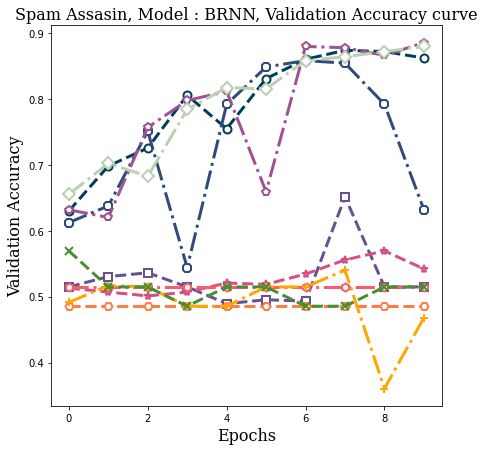

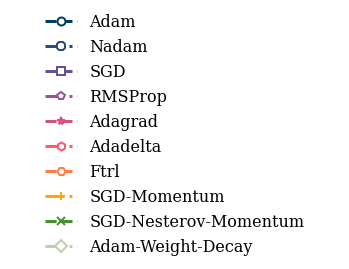

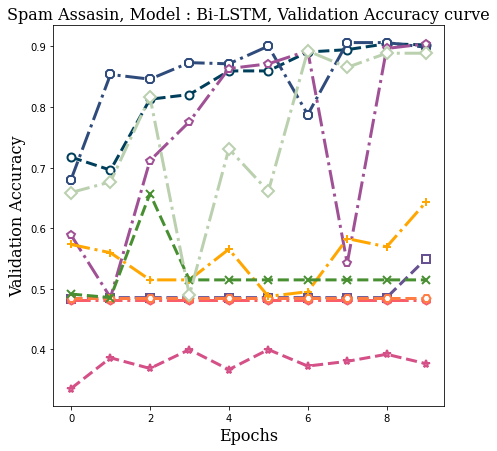

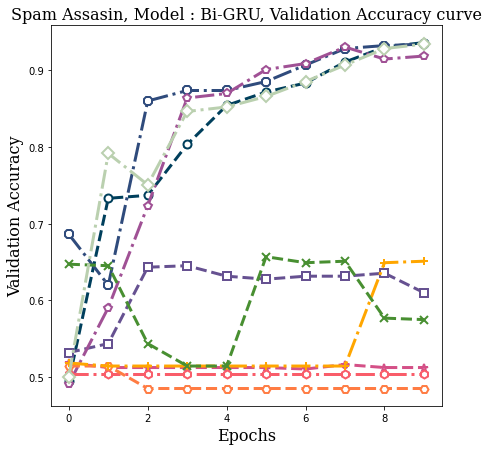

In [36]:
plot_metric("val_accuracy", Histories, "Validation Accuracy")

BRNN [<keras.callbacks.History object at 0x7efd0c8ac2d0>, <keras.callbacks.History object at 0x7efd00157a10>, <keras.callbacks.History object at 0x7efc767379d0>, <keras.callbacks.History object at 0x7efc7608cb90>, <keras.callbacks.History object at 0x7efc706794d0>, <keras.callbacks.History object at 0x7efc702ebc50>, <keras.callbacks.History object at 0x7efb6dec4110>, <keras.callbacks.History object at 0x7efb6d934790>, <keras.callbacks.History object at 0x7efb68a7e7d0>, <keras.callbacks.History object at 0x7efb65f1b410>]
Bi-LSTM [<keras.callbacks.History object at 0x7efb6658bf10>, <keras.callbacks.History object at 0x7efb62096710>, <keras.callbacks.History object at 0x7efb5ed2f410>, <keras.callbacks.History object at 0x7efb486d7410>, <keras.callbacks.History object at 0x7efa24e1a2d0>, <keras.callbacks.History object at 0x7efa22f73210>, <keras.callbacks.History object at 0x7efa22086350>, <keras.callbacks.History object at 0x7efa1f8383d0>, <keras.callbacks.History object at 0x7efa1d1cf410

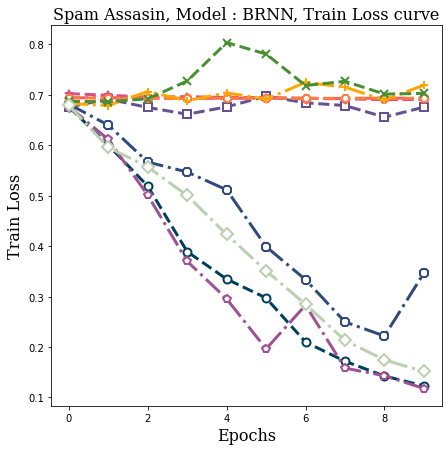

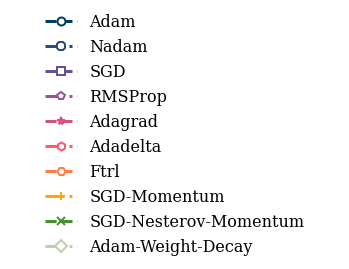

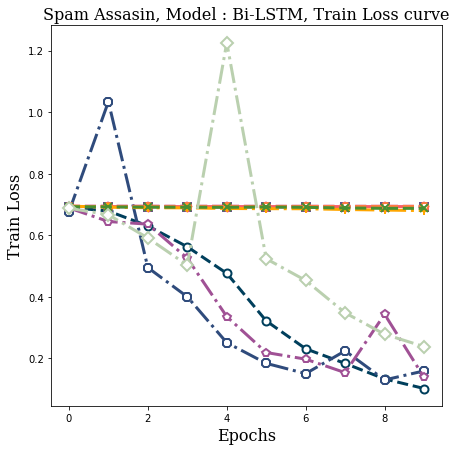

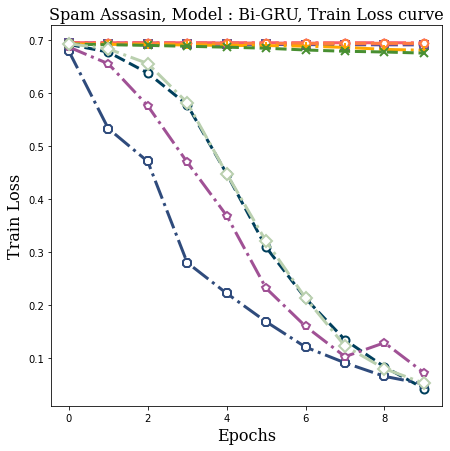

In [37]:
plot_metric("loss", Histories, "Train Loss")

BRNN [<keras.callbacks.History object at 0x7efd0c8ac2d0>, <keras.callbacks.History object at 0x7efd00157a10>, <keras.callbacks.History object at 0x7efc767379d0>, <keras.callbacks.History object at 0x7efc7608cb90>, <keras.callbacks.History object at 0x7efc706794d0>, <keras.callbacks.History object at 0x7efc702ebc50>, <keras.callbacks.History object at 0x7efb6dec4110>, <keras.callbacks.History object at 0x7efb6d934790>, <keras.callbacks.History object at 0x7efb68a7e7d0>, <keras.callbacks.History object at 0x7efb65f1b410>]
Bi-LSTM [<keras.callbacks.History object at 0x7efb6658bf10>, <keras.callbacks.History object at 0x7efb62096710>, <keras.callbacks.History object at 0x7efb5ed2f410>, <keras.callbacks.History object at 0x7efb486d7410>, <keras.callbacks.History object at 0x7efa24e1a2d0>, <keras.callbacks.History object at 0x7efa22f73210>, <keras.callbacks.History object at 0x7efa22086350>, <keras.callbacks.History object at 0x7efa1f8383d0>, <keras.callbacks.History object at 0x7efa1d1cf410

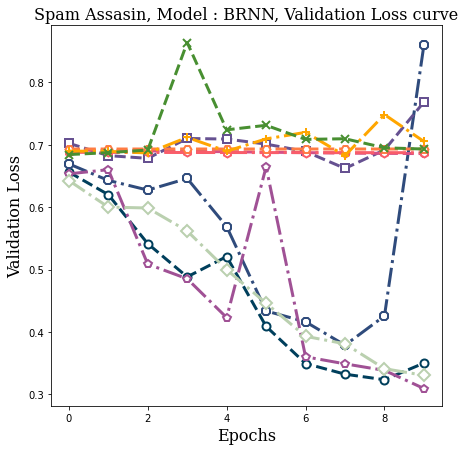

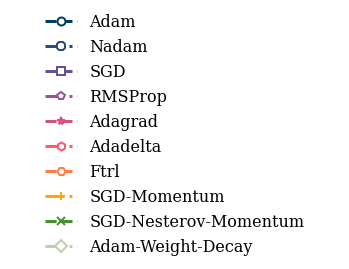

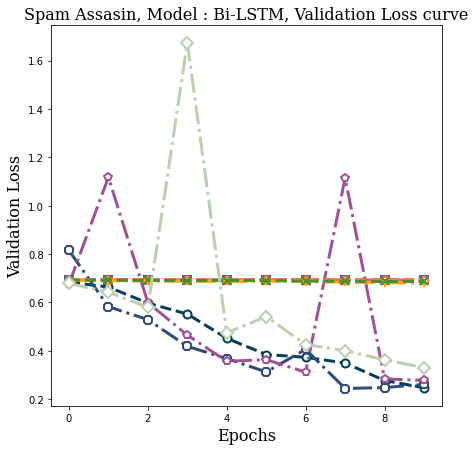

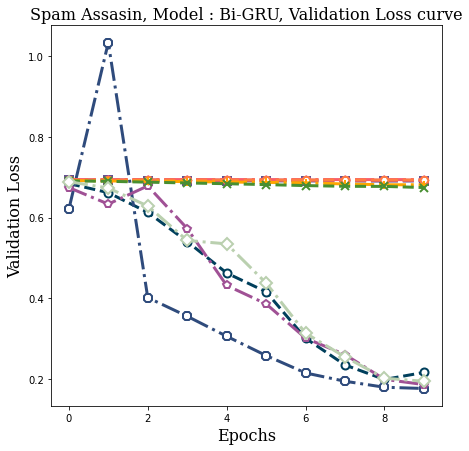

In [38]:
plot_metric("val_loss", Histories, "Validation Loss")

In [39]:
# with open(f"comparison/classifiers/train_test_tf_idf.pkl", "rb") as open_file:
#     dataset_processed = pickle.load(open_file)